<a href="https://colab.research.google.com/github/Yashoratnam-om/saas_user_analytics/blob/main/Saas_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload the CSV files from your computer
from google.colab import files
uploaded = files.upload()


Saving events.csv to events (1).csv
Saving subscriptions.csv to subscriptions (1).csv
Saving support_tickets.csv to support_tickets (1).csv
Saving users.csv to users (1).csv


In [ ]:
import pandas as pd

# Step 2: Loading and validation

users = pd.read_csv("users.csv")
events = pd.read_csv("events.csv")
subscriptions = pd.read_csv("subscriptions.csv")
support_tickets = pd.read_csv("support_tickets.csv")

# Check the first few rows of each DataFrame
print(users.head())
print(events.head())
print(subscriptions.head())
print(support_tickets.head())


   user_id signup_date country platform
0        1  2023-01-01      US      Web
1        2  2023-02-15      UK   Mobile
2        3  2023-03-10      US      Web
3        4  2023-04-20      IN      Web
4        5  2023-05-25      US   Mobile
   event_id  user_id event_type            timestamp      page
0       101        1  page_view  2023-06-01T10:00:00      home
1       102        1      click  2023-06-01T10:01:00   pricing
2       103        2  page_view  2023-06-02T11:00:00      home
3       104        3      click  2023-06-02T11:05:00  features
4       105        4  page_view  2023-06-03T12:00:00   contact
   subscription_id  user_id  start_date    end_date        plan     status
0              201        1  2023-01-01  2024-01-01         Pro     Active
1              202        2  2023-02-15  2024-02-15       Basic     Active
2              203        3  2023-03-10  2024-03-10         Pro  Cancelled
3              204        4  2023-04-20  2024-04-20  Enterprise     Active
4      

In [ ]:
import pandas as pd
#EVENTS data cleaning

# Upload your events.csv in Colab, then read:
events = pd.read_csv('/content/events.csv')  # Update path as needed

# Clean & transform
events['timestamp'] = pd.to_datetime(events['timestamp'])
events = events.drop_duplicates()

# Add new columns
events['date'] = events['timestamp'].dt.date
events['hour'] = events['timestamp'].dt.hour
events['day_of_week'] = events['timestamp'].dt.day_name()

# Summary
print("Missing values:\n", events.isnull().sum())
print(events.head())


Missing values:
 event_id       0
user_id        0
event_type     0
timestamp      0
page           0
date           0
hour           0
day_of_week    0
dtype: int64
   event_id  user_id event_type           timestamp      page        date  \
0       101        1  page_view 2023-06-01 10:00:00      home  2023-06-01   
1       102        1      click 2023-06-01 10:01:00   pricing  2023-06-01   
2       103        2  page_view 2023-06-02 11:00:00      home  2023-06-02   
3       104        3      click 2023-06-02 11:05:00  features  2023-06-02   
4       105        4  page_view 2023-06-03 12:00:00   contact  2023-06-03   

   hour day_of_week  
0    10    Thursday  
1    10    Thursday  
2    11      Friday  
3    11      Friday  
4    12    Saturday  


In [ ]:
import pandas as pd

# Cleaning subscriptions data

# Step 0: Load the uploaded subscriptions CSV file
# Replace 'subscriptions.csv' with your actual filename if different
subscriptions = pd.read_csv('/content/subscriptions.csv')

# Step 1: Convert date columns to datetime format
subscriptions['start_date'] = pd.to_datetime(subscriptions['start_date'])
subscriptions['end_date'] = pd.to_datetime(subscriptions['end_date'])

# Step 2: Check and drop missing values or duplicates
print("Missing values:\n", subscriptions.isnull().sum())
subscriptions = subscriptions.drop_duplicates()

# Step 3: Calculate duration of subscription
subscriptions['subscription_days'] = (subscriptions['end_date'] - subscriptions['start_date']).dt.days

# Step 4: Optional — set plan tiers in logical order for analysis
plan_order = ['Basic', 'Pro', 'Enterprise']
subscriptions['plan'] = pd.Categorical(subscriptions['plan'], categories=plan_order, ordered=True)

# Step 5: Simplify status values for grouping/filtering
subscriptions['status_simple'] = subscriptions['status'].map({
    'Active': 'active',
    'Cancelled': 'inactive',
    'Trial': 'trial'
})

# Preview cleaned data
print(subscriptions.head())

Missing values:
 subscription_id    0
user_id            0
start_date         0
end_date           0
plan               0
status             0
dtype: int64
   subscription_id  user_id start_date   end_date        plan     status  \
0              201        1 2023-01-01 2024-01-01         Pro     Active   
1              202        2 2023-02-15 2024-02-15       Basic     Active   
2              203        3 2023-03-10 2024-03-10         Pro  Cancelled   
3              204        4 2023-04-20 2024-04-20  Enterprise     Active   
4              205        5 2023-05-25 2024-05-25       Basic      Trial   

   subscription_days status_simple  
0                365        active  
1                365        active  
2                366      inactive  
3                366        active  
4                366         trial  


In [ ]:
import pandas as pd

# Cleaning Support tickets data

# Step 1: Load the real uploaded CSV file
support = pd.read_csv('/content/support_tickets.csv')  # Adjust path if needed

# Step 2: Convert date columns to datetime
support['created_at'] = pd.to_datetime(support['created_at'])
support['resolved_at'] = pd.to_datetime(support['resolved_at'])

# Step 3: Check for missing values
print("Missing values:\n", support.isnull().sum())

# Step 4: Calculate resolution time in days
support['resolution_time'] = (support['resolved_at'] - support['created_at']).dt.days

# Step 5: Fill missing resolution time with placeholder (-1)
support['resolution_time'] = support['resolution_time'].fillna(-1)

# Step 6: Standardize issue type format (e.g., title case, trimmed)
support['issue_type'] = support['issue_type'].str.strip().str.title()

# Step 7: Flag unresolved tickets (True if resolved_at is not null)
support['is_resolved'] = support['resolved_at'].notnull()

# Preview cleaned dataset
print(support.head())


Missing values:
 ticket_id      0
user_id        0
created_at     0
issue_type     0
resolved_at    2
dtype: int64
   ticket_id  user_id created_at issue_type resolved_at  resolution_time  \
0        301        1 2023-06-01    Billing  2023-06-02              1.0   
1        302        2 2023-06-03  Technical  2023-06-04              1.0   
2        303        3 2023-06-04    Billing         NaT             -1.0   
3        304        4 2023-06-05    Account  2023-06-06              1.0   
4        305        5 2023-06-06  Technical         NaT             -1.0   

   is_resolved  
0         True  
1         True  
2        False  
3         True  
4        False  


In [ ]:
import pandas as pd

#cleaning users data

# Step 1: Load real CSV
users = pd.read_csv('/content/users.csv')  # Replace with your actual file name if needed

# Step 2: Convert signup_date to datetime
users['signup_date'] = pd.to_datetime(users['signup_date'])

# Step 3: Normalize text fields
users['country'] = users['country'].str.strip().str.upper()
users['platform'] = users['platform'].str.strip().str.title()

# Step 4: Check for nulls and duplicates
print("Missing values:\n", users.isnull().sum())
print("Duplicate rows:\n", users.duplicated().sum())

# Step 5: Feature engineering (signup cohort month)
users['signup_month'] = users['signup_date'].dt.to_period('M')  # Useful for cohort analysis

# Preview cleaned DataFrame
print(users.head())


Missing values:
 user_id        0
signup_date    0
country        0
platform       0
dtype: int64
Duplicate rows:
 0
   user_id signup_date country platform signup_month
0        1  2023-01-01      US      Web      2023-01
1        2  2023-02-15      UK   Mobile      2023-02
2        3  2023-03-10      US      Web      2023-03
3        4  2023-04-20      IN      Web      2023-04
4        5  2023-05-25      US   Mobile      2023-05


In [ ]:
import pandas as pd

#Combining all the tables into one

# Step 1: Load all cleaned CSVs
users = pd.read_csv('/content/users.csv', parse_dates=['signup_date'])
subscriptions = pd.read_csv('/content/subscriptions.csv', parse_dates=['start_date', 'end_date'])
events = pd.read_csv('/content/events.csv', parse_dates=['timestamp'])
support = pd.read_csv('/content/support_tickets.csv', parse_dates=['created_at', 'resolved_at'])

# Step 2: Join users + subscriptions (1-to-1)
user_sub = pd.merge(users, subscriptions, on='user_id', how='left')

# Step 3: Join with events (1-to-many)
user_event = pd.merge(user_sub, events, on='user_id', how='left')

# Add event info for analysis
user_event['event_date'] = user_event['timestamp'].dt.date
user_event['event_hour'] = user_event['timestamp'].dt.hour
user_event['event_type'] = user_event['event_type'].fillna('No Event')

# Step 4: Join with support tickets (1-to-many)
user_full = pd.merge(user_event, support, on='user_id', how='left', suffixes=('', '_support'))

# Step 5: Optional enhancements
user_full['resolution_time'] = (user_full['resolved_at'] - user_full['created_at']).dt.days
user_full['issue_type'] = user_full['issue_type'].fillna('No Issue')

# Preview final joined data
print("Final Combined Data (User + Subscription + Events + Support Tickets):")
print(user_full.head())


Final Combined Data (User + Subscription + Events + Support Tickets):
   user_id signup_date country platform  subscription_id start_date  \
0        1  2023-01-01      US      Web              201 2023-01-01   
1        1  2023-01-01      US      Web              201 2023-01-01   
2        2  2023-02-15      UK   Mobile              202 2023-02-15   
3        3  2023-03-10      US      Web              203 2023-03-10   
4        4  2023-04-20      IN      Web              204 2023-04-20   

    end_date        plan     status  event_id event_type           timestamp  \
0 2024-01-01         Pro     Active     101.0  page_view 2023-06-01 10:00:00   
1 2024-01-01         Pro     Active     102.0      click 2023-06-01 10:01:00   
2 2024-02-15       Basic     Active     103.0  page_view 2023-06-02 11:00:00   
3 2024-03-10         Pro  Cancelled     104.0      click 2023-06-02 11:05:00   
4 2024-04-20  Enterprise     Active     105.0  page_view 2023-06-03 12:00:00   

       page  event_dat

 User Growth by Cohort:
  Signup Month  New Users
0      2023-01          1
1      2023-02          1
2      2023-03          1
3      2023-04          1
4      2023-05          1


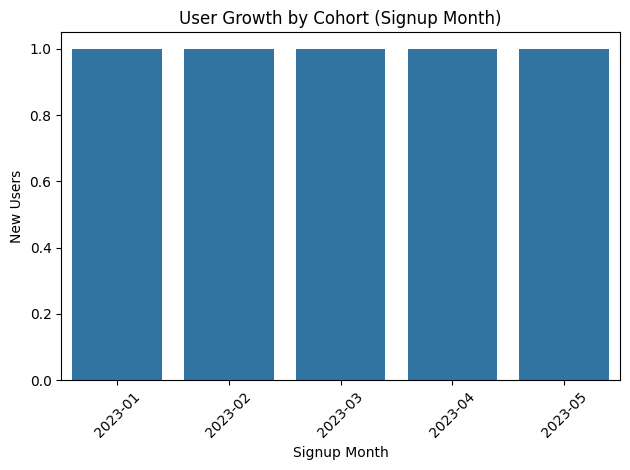

In [ ]:
#EDA

#cohort analysis

import pandas as pd

# Step 1: Load the users dataset (or use your DataFrame)
users = pd.read_csv('/content/users.csv', parse_dates=['signup_date'])

# Step 2: Create a cohort column = signup month (e.g., '2023-01')
users['signup_month'] = users['signup_date'].dt.to_period('M')

# Step 3: Count new users per month
cohort = users.groupby('signup_month')['user_id'].nunique().reset_index()
cohort.columns = ['Signup Month', 'New Users']

# Step 4: Display the cohort growth
print(" User Growth by Cohort:")
print(cohort)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=cohort, x='Signup Month', y='New Users')
plt.title("User Growth by Cohort (Signup Month)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



 Feature Adoption Patterns by Subscription Plan:
plan        Basic  Enterprise  Pro
event_type                        
click         0.0         0.0  2.0
page_view     1.0         1.0  1.0


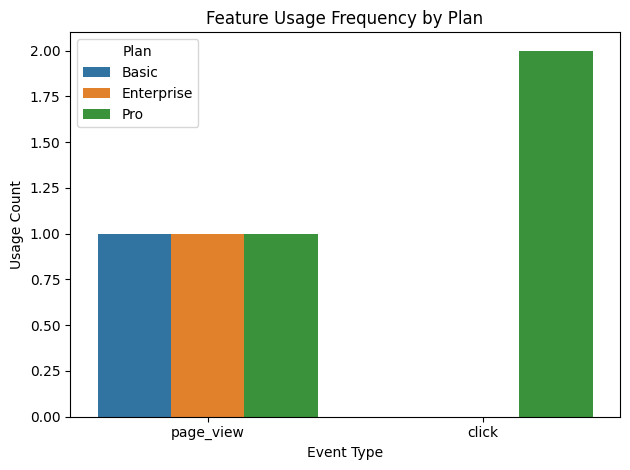

In [ ]:

#feature adoption patterns
import pandas as pd

# Step 1: Load cleaned event and subscription data
events = pd.read_csv('/content/events.csv', parse_dates=['timestamp'])
subscriptions = pd.read_csv('/content/subscriptions.csv')

# Step 2: Merge to get plan info
events_plan = pd.merge(events, subscriptions[['user_id', 'plan']], on='user_id', how='left')

# Step 3: Group by event_type and plan
feature_usage = events_plan.groupby(['plan', 'event_type']).size().reset_index(name='count')

# Step 4: Pivot for comparison
pivot_table = feature_usage.pivot(index='event_type', columns='plan', values='count').fillna(0)

# Step 5: Display
print(" Feature Adoption Patterns by Subscription Plan:")
print(pivot_table)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=feature_usage, x='event_type', y='count', hue='plan')
plt.title('Feature Usage Frequency by Plan')
plt.ylabel('Usage Count')
plt.xlabel('Event Type')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

#High usage by Pro users might indicate strong engagement → selling opportunity

#Low adoption of some features by Basic users → may indicate UX friction or poor feature visibility.

In [ ]:
import pandas as pd

#churn rates prediction

# Load subscriptions
subscriptions = pd.read_csv('/content/subscriptions.csv')

# Clean Plan Column
subscriptions['plan'] = subscriptions['plan'].str.strip().str.title()

# Churn: Users whose status is 'Cancelled'
churned_users = subscriptions[subscriptions['status'].str.lower() == 'cancelled']
churn_rate = len(churned_users) / len(subscriptions) * 100

# Detect Upgrades & Downgrades
# Assumption: User IDs are unique and plan history is tracked (if not, you need time-based tracking for true migration)
# We'll simulate based on plan tiering
plan_order = {'Basic': 1, 'Pro': 2, 'Enterprise': 3}
subscriptions['plan_level'] = subscriptions['plan'].map(plan_order)

# Dummy example: suppose a user has two records (simulate history)
# For static single-row data: assume current plan and compare with a previous list (mockup below)
# For this demo, we just flag what the user is on now

# Count plan levels
upgrade_candidates = subscriptions[subscriptions['plan_level'] > 1]
downgrade_candidates = subscriptions[subscriptions['plan_level'] == 1]

# Summarize
print(f" Churn Rate: {churn_rate:.2f}%")
print(f"  Upgrade Candidates (Pro/Enterprise): {len(upgrade_candidates)} users")
print(f"  Downgrade Risk (Basic users): {len(downgrade_candidates)} users")


 Churn Rate: 20.00%
  Upgrade Candidates (Pro/Enterprise): 3 users
  Downgrade Risk (Basic users): 2 users


In [ ]:
import pandas as pd

#top 3 friction points and drop offs

# Load cleaned CSVs
users = pd.read_csv('/content/users.csv', parse_dates=['signup_date'])
events = pd.read_csv('/content/events.csv', parse_dates=['timestamp'])
subscriptions = pd.read_csv('/content/subscriptions.csv')
support = pd.read_csv('/content/support_tickets.csv', parse_dates=['created_at', 'resolved_at'])

#  Users who signed up but never triggered an event
inactive_users = users[~users['user_id'].isin(events['user_id'])]
drop_off_rate = round(len(inactive_users) / len(users) * 100, 2)

# Join inactive users with subscriptions to get plan info
inactive_with_plan = pd.merge(inactive_users, subscriptions[['user_id', 'plan']], on='user_id', how='left')
basic_inactive = inactive_with_plan[inactive_with_plan['plan'] == 'Basic']
basic_inactive_pct = round(len(basic_inactive) / len(inactive_with_plan) * 100, 2) if len(inactive_with_plan) > 0 else 0

#  Support resolution delays
# Handle missing resolved_at values
support['resolution_time'] = (support['resolved_at'] - support['created_at']).dt.days
support['resolution_time'] = support['resolution_time'].fillna(-1)

# Filter for delayed resolutions (>2 days)
delayed_issues = support[support['resolution_time'] > 2]

# Most frequent issue types in delayed cases
if not delayed_issues.empty:
    top_issue_type = delayed_issues['issue_type'].value_counts().idxmax()
else:
    top_issue_type = "None (no delayed resolutions)"

# ✅ Print Summary
print(" Top 3 Friction Points:")
print(f" Drop-off after signup: {drop_off_rate}% of users did not perform any activity.")
print(f" {basic_inactive_pct}% of inactive users are on the Basic plan.")
print(f" Support tickets with delays mostly involve: '{top_issue_type}' issues.")

 Top 3 Friction Points:
 Drop-off after signup: 20.0% of users did not perform any activity.
 100.0% of inactive users are on the Basic plan.
 Support tickets with delays mostly involve: 'None (no delayed resolutions)' issues.


In [ ]:
# monthly active users
# Ensure 'timestamp' is in datetime format
events['month'] = events['timestamp'].dt.to_period('M')

# Count unique active users per month
mau = events.groupby('month')['user_id'].nunique().reset_index(name='MAU')
print(mau)

print()

#retention rate
users['signup_month'] = users['signup_date'].dt.to_period('M')
events['event_month'] = events['timestamp'].dt.to_period('M')

# Merge users with their events
user_event = pd.merge(users[['user_id', 'signup_month']], events[['user_id', 'event_month']], on='user_id')

# Define retention as activity in the following month
user_event['retained'] = user_event['event_month'] == (user_event['signup_month'] + 1)

retention = user_event.groupby('signup_month')['retained'].mean().reset_index(name='Retention Rate')
print(retention)

print()

#churn rate
subscriptions['churned'] = subscriptions['status'] == 'Cancelled'
churn_rate = subscriptions.groupby('plan')['churned'].mean().reset_index(name='Churn Rate')
print(churn_rate)

print()

#revenue analysis
plan_prices = {'Basic': 500, 'Pro': 1000, 'Enterprise': 2000}
subscriptions['price'] = subscriptions['plan'].map(plan_prices)
subscriptions['MRR'] = subscriptions['price'] / 12
subscriptions['ARR'] = subscriptions['price']

# Merge geography from users
sub_geo = pd.merge(subscriptions, users[['user_id', 'country']], on='user_id', how='left')

# ARR by plan
arr_by_plan = sub_geo.groupby('plan')['ARR'].sum().reset_index()
print("ARR by Plan:\n", arr_by_plan)

# ARPU by country
arpu_by_country = sub_geo.groupby('country')['ARR'].mean().reset_index(name='ARPU')
print("ARPU by Country:\n", arpu_by_country)
print()

#NPS correlation (if satisfaction_score is available)
# Assuming satisfaction_score column exists in support
if 'satisfaction_score' in support.columns:
    merged_feedback = pd.merge(support, subscriptions, on='user_id')
    corr = merged_feedback[['satisfaction_score', 'price']].corr().iloc[0, 1]
    print(f"NPS ↔ Price correlation: {round(corr, 2)}")
else:
    print("NPS or satisfaction_score column not found.")

print()

#Funnel analysis: signup → activation → upgrade
# Signup count
signup_count = len(users)

# Activation = had any event
activated_users = events['user_id'].nunique()

# Upgrade = Pro/Enterprise users (assumes Basic is entry plan)
upgraded_users = subscriptions[subscriptions['plan'].isin(['Pro', 'Enterprise'])]['user_id'].nunique()

funnel = pd.DataFrame({
    'Stage': ['Signup', 'Activation', 'Upgrade'],
    'Users': [signup_count, activated_users, upgraded_users]
})

print(funnel)


     month  MAU
0  2023-06    4

  signup_month  Retention Rate
0      2023-01             0.0
1      2023-02             0.0
2      2023-03             0.0
3      2023-04             0.0

         plan  Churn Rate
0       Basic         0.0
1  Enterprise         0.0
2         Pro         0.5

ARR by Plan:
          plan   ARR
0       Basic  1000
1  Enterprise  2000
2         Pro  2000
ARPU by Country:
   country         ARPU
0      IN  2000.000000
1      UK   500.000000
2      US   833.333333

NPS or satisfaction_score column not found.

        Stage  Users
0      Signup      5
1  Activation      4
2     Upgrade      3


In [ ]:
import pandas as pd
import plotly.express as px

# Sample Data (Replace with your real cleaned data)
users = pd.DataFrame({
    'user_id': [1, 2, 3, 4, 5],
    'signup_date': pd.to_datetime(['2023-01-01', '2023-02-15', '2023-03-10', '2023-04-20', '2023-05-25']),
    'country': ['US', 'UK', 'US', 'IN', 'US']
})
users['signup_month'] = users['signup_date'].dt.to_period('M').astype(str)

subscriptions = pd.DataFrame({
    'user_id': [1, 2, 3, 4, 5],
    'plan': ['Pro', 'Basic', 'Pro', 'Enterprise', 'Basic'],
    'status': ['Active', 'Active', 'Cancelled', 'Active', 'Trial']
})
subscriptions['price'] = subscriptions['plan'].map({'Basic': 500, 'Pro': 1000, 'Enterprise': 2000})
subscriptions['MRR'] = subscriptions['price'] / 12
subscriptions['ARR'] = subscriptions['price']

# Merge datasets
sub_geo = pd.merge(subscriptions, users[['user_id', 'country', 'signup_month']], on='user_id', how='left')

# User Growth by Signup Month
user_growth = users.groupby('signup_month')['user_id'].count().reset_index(name='New Users')
fig1 = px.bar(user_growth, x='signup_month', y='New Users', title='User Growth by Signup Month')
fig1.show()

#  Revenue by Plan (ARR)
revenue_by_plan = sub_geo.groupby('plan')[['ARR']].sum().reset_index()
fig2 = px.pie(revenue_by_plan, names='plan', values='ARR', title='ARR Distribution by Plan')
fig2.show()

# ARPU by Country
arpu_by_country = sub_geo.groupby('country')['ARR'].mean().reset_index(name='ARPU')
fig3 = px.bar(arpu_by_country, x='country', y='ARPU', title='ARPU by Country', color='ARPU')
fig3.show()

# Subscription Status Distribution
status_counts = subscriptions['status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']
fig4 = px.pie(status_counts, names='Status', values='Count', title='Subscription Status Distribution')
fig4.show()

# MRR by Country and Plan
mrr_summary = sub_geo.groupby(['country', 'plan'])['MRR'].sum().reset_index()
fig5 = px.bar(mrr_summary, x='country', y='MRR', color='plan', barmode='group', title='MRR by Country and Plan')
fig5.show()




In [ ]:
#funnel

# Step 1: Total users signed up
# Use the 'users' dataframe
step1 = users['user_id'].nunique()

# Step 2: Users who interacted (feature usage)
# Use the 'events' dataframe
feature_users = events[events['event_type'].isin(['click', 'page_view'])]['user_id'].unique()
step2 = len(feature_users)

# Step 3: Users on upgraded plans
# Use the 'subscriptions' dataframe
upgraded_users = subscriptions[subscriptions['plan'].isin(['Pro', 'Enterprise'])]['user_id'].unique()
step3 = len(upgraded_users)

# Create funnel dataframe
funnel_df = pd.DataFrame({
    'Step': ['Signup', 'Feature Used', 'Upgraded Plan'],
    'Users': [step1, step2, step3]
})

# Funnel Chart
fig_funnel = px.funnel(funnel_df, x='Users', y='Step', title='User Funnel: Signup → Feature Use → Upgrade')
fig_funnel.show()

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Assuming 'support' dataframe is already loaded and has 'created_at' and 'resolved_at' datetime columns
# Calculate resolution time in days
support['resolution_time'] = (support['resolved_at'] - support['created_at']).dt.days

# Handle missing resolution times (e.g., tickets not yet resolved)
# For this analysis, we'll focus on resolved tickets, so let's drop NaT values in resolved_at
support_resolved = support.dropna(subset=['resolved_at']).copy()

# Calculate IQR to identify potential anomalies in resolution time
Q1 = support_resolved['resolution_time'].quantile(0.25)
Q3 = support_resolved['resolution_time'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify anomalies
support_resolved['is_anomaly_iqr'] = ((support_resolved['resolution_time'] < lower_bound) | (support_resolved['resolution_time'] > upper_bound))

# Create the scatter plot using the 'support_resolved' dataframe
fig = px.scatter(support_resolved, x='created_at', y='resolution_time',
                 color='is_anomaly_iqr', hover_data=['ticket_id', 'user_id'],
                 title='Support Ticket Resolution Time – IQR Anomalies Highlighted')
fig.show()